In [1]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import ast
# import community
from wordcloud import WordCloud

multiplayer:
	ark survival evolved
	garrys mod
	dead by daylight
	sid meiers civilization vi
	rocket league
	human fall flat
	insurgency sandstorm
	rust
	grand theft auto v
	playerunknowns battlegrounds

coop:
	astroneer
	dont starve together
	divinity original sin 2  definitive edition
	monster hunter world
	stardew valley
	terraria
	left 4 dead 2

singleplayer:
	factorio
	euro truck simulator 2
	slay the spire
	subnautica
	the elder scrolls v skyrim special edition
	rimworld
	resident evil 2


In [2]:
competitive = [
    'rocket league',
    'dead by daylight',
    'insurgency sandstorm',
    'playerunknowns battlegrounds',
]

In [3]:
survival = [
    'ark survival evolved',
    'rust',
    'astroneer',
	'dont starve together',
    'stardew valley',
    'rimworld',
    'subnautica',
]

In [4]:
rpg = [
    'divinity original sin 2  definitive edition',
	'monster hunter world',
    'terraria',
    'slay the spire',
    'the elder scrolls v skyrim special edition',
]

In [5]:
fps = [
    'grand theft auto v',
	'playerunknowns battlegrounds',
    'left 4 dead 2',
    'resident evil 2',
]

In [6]:
multiplayer = [
    'ark survival evolved',
	'garrys mod',
	'dead by daylight',
	'sid meiers civilization vi',
	'rocket league',
	'human fall flat',
	'insurgency sandstorm',
	'rust',
	'grand theft auto v',
	'playerunknowns battlegrounds',
]

coop = [
	'astroneer',
	'dont starve together',
	'divinity original sin 2  definitive edition',
	'monster hunter world',
	'stardew valley',
	'terraria',
	'left 4 dead 2',
]

singleplayer = [
	'factorio',
	'euro truck simulator 2',
	'slay the spire',
	'subnautica',
	'the elder scrolls v skyrim special edition',
	'rimworld',
	'resident evil 2',
]

In [7]:
# competitive survival rpg fps multiplayer coop singleplayer

grupo_escolhido = singleplayer
pasta = 'singleplayer'

In [8]:
G = nx.read_gml('../Dados/grafo_corrigido.gml')

In [9]:
print(len(list(G.nodes(data=True))))

# Remover nós que não são do grupo respectivo
for node in list(G.nodes(data=True)):
    if node[0].split('_')[0] not in grupo_escolhido:
        G.remove_node(node[0])

print(len(list(G.nodes(data=True))))

3087
52


In [10]:
# Remover nós que não são pequenos demais
for node in list(G.nodes(data=True)):
    lista = ast.literal_eval(node[1]['topic_info'])
    if lista == False:
        G.remove_node(node[0])
        continue
    if lista[1][0] == '':
        G.remove_node(node[0])

In [11]:
# Remover as arestas com 'weight' menor que 0.9
print(len(G.edges()))
for edge in list(G.edges(data=True)):
    if edge[2]['weight'] < 0.9:
        G.remove_edge(edge[0], edge[1])
print(len(G.edges()))

351
20


In [12]:
print(len(list(G.nodes(data=True))))

45


### community louvain

In [13]:
# Executar o algoritmo Louvain para detecção de comunidades
partition = community_louvain.best_partition(G, weight='weight')

In [14]:
dicionario_invertido = {}

# alterar o dicionario para ser grupo: lista de tópicos
for nome_no, comunidade in partition.items():
    if comunidade not in dicionario_invertido:
        dicionario_invertido[comunidade] = []
    dicionario_invertido[comunidade].append(nome_no)

# dicionario_invertido

In [15]:
dicionario_invertido_filtrado = {}

# remover comunidades que só tem um tópico
for comunidade, nomes_nos in dicionario_invertido.items():
    if len(nomes_nos) > 1:
        dicionario_invertido_filtrado[comunidade] = nomes_nos

# dicionario_invertido_filtrado

### iterar sob cada comunidade

2
['euro truck simulator 2_topico2', 'resident evil 2_topico10', 'slay the spire_topico2']
{'slay the spire', 'euro truck simulator 2', 'resident evil 2'}
[('game', 0.5926373), ('nice', 0.52029413), ('playing', 0.4601277), ('great', 0.4558851), ('played', 0.44114625), ('play', 0.44001347), ('amazing', 0.4270119), ('awesome', 0.42606544), ('pretty', 0.4165281), ('fun', 0.41216612)] [('game', 0.6401956), ('great', 0.510658), ('play', 0.47212625), ('fantastic', 0.46506447), ('fun', 0.45452994), ('gameplay', 0.4301608), ('outstanding', 0.42683786), ('excellent', 0.42511255), ('beautiful', 0.37668806), ('awesome', 0.36962306)] [('game', 0.73005986), ('good', 0.590215), ('fun', 0.52744865), ('great', 0.4752835), ('best', 0.4527325), ('bad', 0.43960512), ('better', 0.4346943), ('hello', 0.41512537), ('superb', 0.40745074), ('', 0.40317005)]
4
['euro truck simulator 2_topico4', 'factorio_topico1', 'resident evil 2_topico2', 'rimworld_topico0', 'slay the spire_topico1', 'the elder scrolls v sky

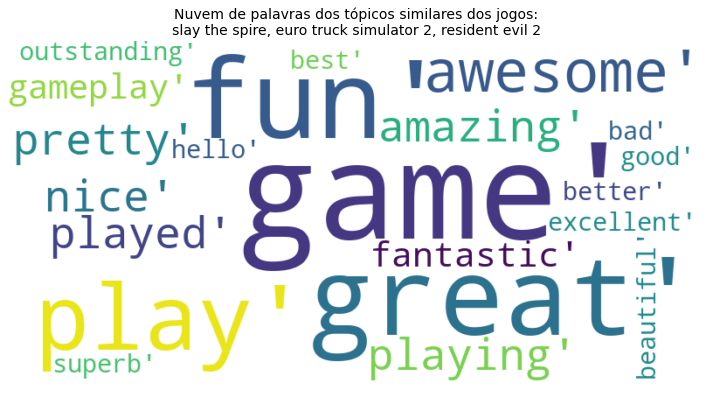

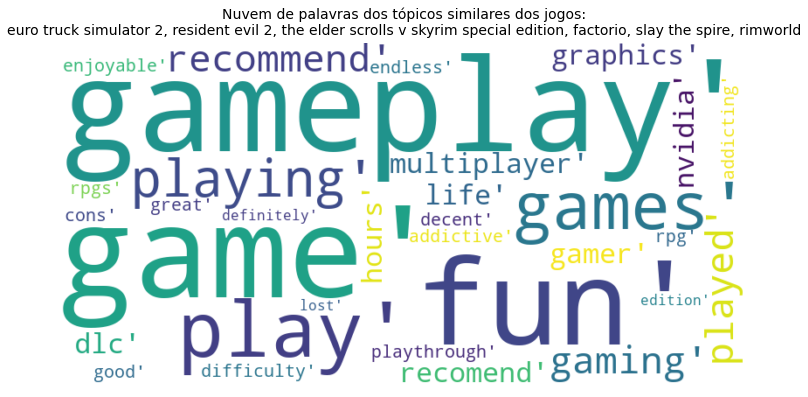

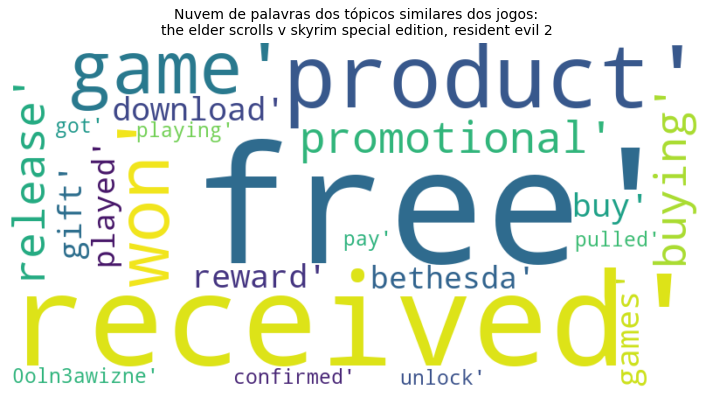

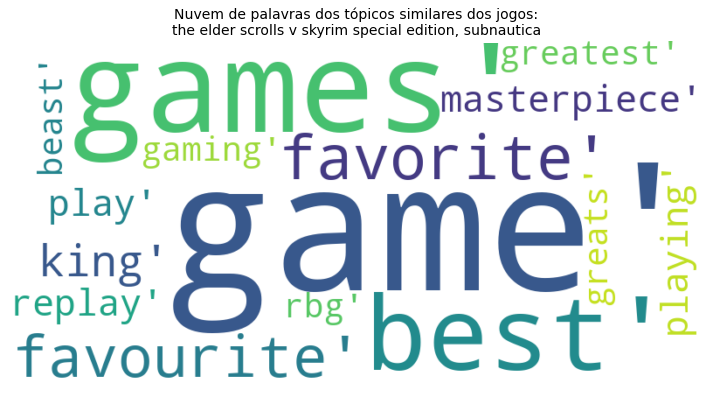

In [16]:
contador = 0
for grupo, nos in dicionario_invertido_filtrado.items():
    print(grupo)
    print(nos)

    jogos = []
    for jogo in nos:
        jogos.append(jogo.split('_')[0])
    jogos = set(jogos)
    print(jogos)
    concatenated_jogos = ', '.join(jogos)

    data = []
    for topico in nos:
        data.append((topico, G.nodes[topico]))

    # Concatenar todas as palavras-chave dos tópicos em uma única string
    text = " ".join([attributes['topic_info'] for _, attributes in data])
    print(text)

     # Criar um objeto WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Configurar o tamanho da figura
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar a nuvem de palavras
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

    # Adicionar título com quebra de linha
    title = "Nuvem de palavras dos tópicos similares dos jogos:\n" + concatenated_jogos
    ax.set_title(title, fontsize=14, bbox=dict(facecolor='white', edgecolor='white'))

    # Ajustar o tamanho da figura para que o título tenha o mesmo tamanho da imagem
    fig.tight_layout()

    # Exibir a nuvem de palavras
    # plt.show()

    # nome do arquivo
    arquivo = "../Dados/wordclouds/" + pasta + "/wordcloud_" + str(contador) + '.png'
    contador +=1

    # Salvar a imagem
    fig.savefig(arquivo, dpi=300)